In [1]:
from google.colab import files
uploaded = files.upload()

Saving diabetes.csv to diabetes.csv


#IMPORTING LIBRARIES

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
df = pd.read_csv('diabetes.csv')
#used to read csv files and perform operations on it

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#HANDLING CATEGORICAL DATA

In [4]:
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
x = df.iloc[:, :-1].values 
y = df.iloc[:, -1].values 
labelencoder_X1 = LabelEncoder()
x[:,0] = labelencoder_X1.fit_transform(x[:,0])
x[:,1] = labelencoder_X1.fit_transform(x[:,1])
print(x)
#Here we are using LabelEncoder

[[  6.     86.     72.    ...  33.6     0.627  50.   ]
 [  1.     23.     66.    ...  26.6     0.351  31.   ]
 [  8.    121.     64.    ...  23.3     0.672  32.   ]
 ...
 [  5.     59.     72.    ...  26.2     0.245  30.   ]
 [  1.     64.     60.    ...  30.1     0.349  47.   ]
 [  1.     31.     70.    ...  30.4     0.315  23.   ]]


#SPLITTING OF DATA INTO TRAINING AND TEST

In [5]:
from sklearn.model_selection import train_test_split

#import model selection train test split for splitting the data into test and train for model validation.

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=101)


#NORMALIZING DATA

In [7]:
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(x_train)

# transform training data
X_train_norm = norm.transform(x_train)

# transform testing data
X_test_norm = norm.transform(x_test)

print(X_train_norm)
print(X_test_norm)

[[0.0625     0.28148148 0.6        ... 0.35171386 0.2831384  0.09803922]
 [0.125      0.44444444 0.63636364 ... 0.54843517 0.12426901 0.11764706]
 [0.0625     0.37777778 0.58181818 ... 0.50074516 0.22319688 0.        ]
 ...
 [0.0625     0.42222222 0.4        ... 0.5290611  0.09502924 0.07843137]
 [0.3125     0.39259259 0.69090909 ... 0.46497765 0.12573099 0.45098039]
 [0.5625     0.5037037  0.63636364 ... 0.50968703 0.27631579 0.47058824]]
[[0.0625     0.47407407 0.54545455 ... 0.4485842  0.12865497 0.50980392]
 [0.1875     0.91851852 0.63636364 ... 0.54247392 0.15740741 0.29411765]
 [0.4375     0.32592593 0.83636364 ... 0.33830104 0.07309942 0.52941176]
 ...
 [0.25       0.23703704 0.59090909 ... 0.3681073  0.03070175 0.        ]
 [0.3125     0.93333333 0.58181818 ... 0.46497765 0.24269006 0.15686275]
 [0.125      0.18518519 0.52727273 ... 0.48733234 0.03947368 0.07843137]]


#GRAPHS

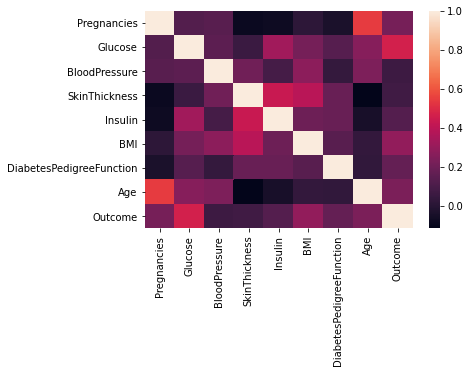

In [8]:
sns.heatmap(df.corr())

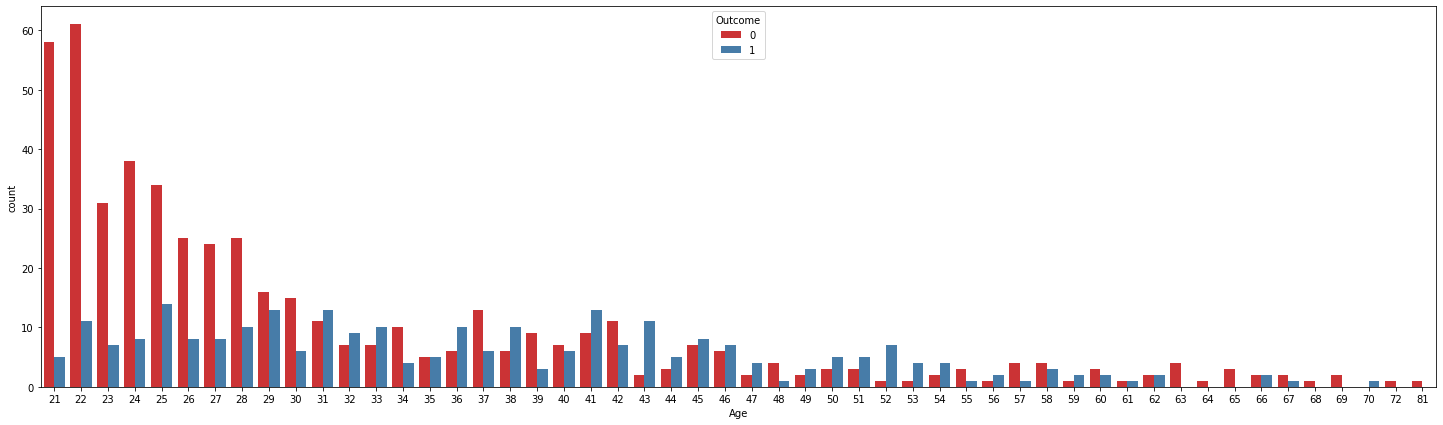

In [9]:
plt.figure(figsize=(25,7))
sns.countplot(x='Age',hue='Outcome',data=df,palette='Set1')

#ALGORITHM

In [10]:
knn = KNeighborsClassifier(n_neighbors=11,p=2,metric='euclidean')

#FITTING OF TRAINING DATA

In [11]:
knn.fit(x_train,y_train)
#training or fitting the train data into the model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                     weights='uniform')

#PREDICTIONS FOR OUR PROBLEM STATEMENT WITH THE RELATED GRAPHS

In [12]:
predictions = knn.predict(x_test)

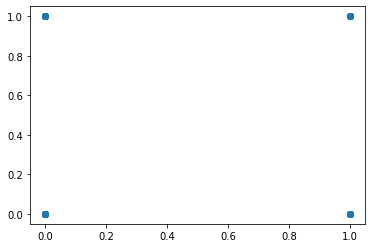

In [13]:
plt.scatter(y_test,predictions)

#EVALUATION

In [14]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.3116883116883117
MSE: 0.3116883116883117
RMSE: 0.5582905262390825


In [15]:
print(metrics.accuracy_score(y_test, predictions))

0.6883116883116883


#SAVING THE MODEL USING PICKLE LIBRARY

In [16]:
import pickle 

# Save the trained model as a pickle string. 
saved_model = pickle.dumps(knn) 

# Load the pickled model 
lm_from_pickle = pickle.loads(saved_model) 

# Use the loaded pickled model to make predictions 
lm_from_pickle.predict(x_test) 


array([1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,

#ACCURACY w.r.t TRAINED DATA

Confusion Matrix


In [17]:
from sklearn.metrics import confusion_matrix
y_train=y_train[0:308]
results =confusion_matrix(y_train, predictions)
print(results)

[[129  71]
 [ 69  39]]


Precision, Recall, Support, Fscore

In [18]:
import numpy
from sklearn.metrics import precision_recall_fscore_support

precision_recall_fscore_support(y_train, predictions, average='macro')

(0.503030303030303, 0.5030555555555556, 0.5030196855838827, None)

#ACCURACY w.r.t TEST DATA

Confusion Matrix

In [19]:
from sklearn.metrics import confusion_matrix

results =confusion_matrix(y_test, predictions)
print(results)

[[152  50]
 [ 46  60]]


Precision, Recall, Support, Fscore

In [20]:
import numpy
from sklearn.metrics import precision_recall_fscore_support

precision_recall_fscore_support(y_test, predictions, average='macro')

(0.6565656565656566, 0.6592564916869046, 0.6577777777777778, None)